In this task, I will use a publicly available dataset to predict the future download rate of a python ML module called pycaret

In [1]:
#We first install  pycaret
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Import important modules
import pandas as pd
from pycaret.datasets import get_data

In [6]:
#Load data and display first ten rows
Caret_df = get_data('pycaret_downloads')
Caret_df.head(5)

INFO:logs:Preparing display monitor


,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [7]:
#Summary of data info
Caret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    90 non-null     object
 1   Total   90 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [8]:
#Converting the date to appropriate format 
Caret_df['Date'] = pd.to_datetime(Caret_df['Date'])
Caret_df = Caret_df.groupby('Date').sum()

In [9]:
Caret_df = Caret_df.asfreq('D')
Caret_df.head()

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542


In [11]:
#Display data shape
Caret_df.shape

(90, 1)

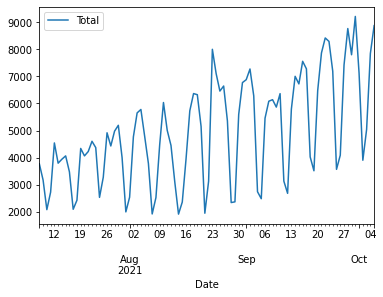

In [10]:
#plot the data
Caret_df.plot();

In [17]:
#Preprocessing the data
from pycaret.time_series import *
#from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
#exp = TimeSeriesExperiment()
exp = setup(Caret_df, fh = 7, fold = 3, session_id = 123)

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: 282d
INFO:logs:self.variable_keys: {'_all_metrics', 'exp_name_log', 'fold_generator', 'fh', 'n_jobs_param', 'seasonal_period', 'seasonality_present', 'variable_keys', 'pipeline', 'log_plots_param', 'experiment__', 'html_param', 'approach_type', '_all_models', 'exogenous_present', 'X_transformed', 'X_test_transformed', '_all_models_internal', 'y_test_transformed', 'X', 'exp_id', 'y_transformed', 'X_train', 'gpu_param', 'y', 'USI', 'display_container', 'y_test', 'y_train_transformed', 'X_test', 'all_sp_values', 'index_type', 'enforce_exogenous', 'logging_param', 'data', '_available_plots', 'strictly_positive', '_ml_usecase', '_gpu_n_jobs_param', 'idx', 'X_train_transformed', 'enforce_pi', 'fold_param', 'y_train', 'fold_groups_param_full', 'primary_sp_to_use', 'seed', 'master_model_container

,Description,Value
0,session_id,123
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(90, 1)"
5,Train data shape,"(83, 1)"
6,Test data shape,"(7, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,3
9,Enforce Prediction Interval,False


INFO:logs:setup() successfully completed in 0.62s...............


In [18]:
#Exploratory Data Analysis
exp.plot_model(plot = 'ts')

INFO:logs:Visual Rendered Successfully


In [19]:
# cross-validation plot
exp.plot_model(plot = 'cv')

INFO:logs:Visual Rendered Successfully


In [20]:
# Diagnostics plot
exp.plot_model(plot = 'diagnostics')

INFO:logs:Visual Rendered Successfully


In [21]:
# Decomposition plot
exp.plot_model(plot = 'decomp_stl')

INFO:logs:Visual Rendered Successfully


In [22]:
#Training the model
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,531.9167,626.2099,0.0911,0.0916,0.849,0.6902,0.8632,2.4133
arima,ARIMA,568.4974,687.2509,0.0957,0.0975,0.9085,0.758,0.8316,0.1933
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,571.1749,672.9608,0.1022,0.099,0.9132,0.7415,0.8368,0.2533
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,583.112,715.5584,0.1014,0.0996,0.9318,0.789,0.8204,0.6200
theta,Theta Forecaster,543.8821,691.2579,0.0947,0.1017,0.8724,0.7628,0.814,0.0533
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,604.1178,706.2955,0.1052,0.1041,0.9669,0.7788,0.8196,0.0700
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,614.7098,728.1451,0.1055,0.1044,0.9818,0.8031,0.8137,0.6800
exp_smooth,Exponential Smoothing,542.7593,635.8877,0.0994,0.1062,0.8697,0.7016,0.8487,0.0867
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,632.7132,746.7205,0.1081,0.1075,1.0093,0.8238,0.8079,0.0967
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,632.7132,746.7205,0.1081,0.1075,1.0093,0.8238,0.8079,0.0433


INFO:logs:master_model_container: 27
INFO:logs:display_container: 2
INFO:logs:AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:compare_models() successfully completed......................................


In [23]:
#Examine individual model performance
prophet = exp.create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-09-07,579.0230,655.8323,0.1347,0.1232,0.9371,0.7150,0.8212
1,2021-09-14,641.2997,816.9058,0.1024,0.1088,1.0449,0.9101,0.7413
2,2021-09-21,870.3595,987.0928,0.1183,0.1250,1.3490,1.0889,0.7477
Mean,NaT,696.8941,819.9436,0.1185,0.1190,1.1104,0.9047,0.7701
SD,NaT,125.2658,135.2536,0.0132,0.0073,0.1744,0.1527,0.0363


INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:ProphetPeriodPatched()
INFO:logs:create_model() successfully completed......................................


ProphetPeriodPatched()


In [24]:
#Perform model tuning process on the trained prophet model
tuned_prophet = exp.tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-09-07,649.0133,711.2920,0.1351,0.1270,1.0504,0.7755,0.7897
1,2021-09-14,585.7227,718.3329,0.0986,0.1071,0.9544,0.8003,0.7999
2,2021-09-21,654.0601,707.8418,0.0942,0.0991,1.0138,0.7809,0.8703
Mean,NaT,629.5987,712.4889,0.1093,0.1111,1.0062,0.7855,0.8200
SD,NaT,31.0934,4.3658,0.0183,0.0117,0.0396,0.0107,0.0358


INFO:logs:master_model_container: 31
INFO:logs:display_container: 4
INFO:logs:ProphetPeriodPatched(changepoint_prior_scale=0.07052367291265604,
                     holidays_prior_scale=0.2772015819815348,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.15960727025988383)
INFO:logs:tune_model() succesfully completed......................................


ProphetPeriodPatched(changepoint_prior_scale=0.07052367291265604,
                     holidays_prior_scale=0.2772015819815348,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.15960727025988383)


In [25]:
# Model Plotting
exp.plot_model(tuned_prophet, plot = 'forecast')

INFO:logs:Visual Rendered Successfully


In [26]:
# Best Model Plotting
exp.plot_model(best, plot = 'forecast')

INFO:logs:Visual Rendered Successfully


In [27]:
# forecast in unknown future with the best model
exp.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

INFO:logs:Visual Rendered Successfully


In [28]:
#Best Model in-sample plot
exp.plot_model(best, plot = 'insample')

INFO:logs:Visual Rendered Successfully


In [29]:
#Best Model residuals plot
exp.plot_model(best, plot = 'residuals')

INFO:logs:Visual Rendered Successfully


In [30]:
#Best Model diagnostics plot
exp.plot_model(best, plot = 'diagnostics')

INFO:logs:Visual Rendered Successfully


In [31]:
## Deployment of final model
final_best = exp.finalize_model(best)# generate predictions
exp.predict_model(final_best, fh = 90)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f9c07d14410>, estimator=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing AutoARIMA(random_state=123, sp=7, suppress_warnings=True)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7f9c07d14410>, estimator=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Decl

,y_pred
2021-10-06,8392.9108
2021-10-07,9061.0279
2021-10-08,7701.1349
2021-10-09,4390.7424
2021-10-10,4972.7521
...,...
2021-12-30,13175.0349
2021-12-31,11815.1419
2022-01-01,8504.7494
2022-01-02,9086.7591


In [32]:
# save the best model
exp.save_model(final_best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=AutoARIMA(random_state=123, sp=7, suppress_warnings=True), model_name=my_best_model, prep_pipe_=PyCaretForecastingPipeline(steps=[('forecaster',
                                   TransformedTargetForecaster(steps=[('model',
                                                                       DummyForecaster())]))]), verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:PyCaretForecastingPipeline(steps=[('forecaster',
                                   TransformedTargetForecaster(steps=[('model',
                                                                       AutoARIMA(random_state=123,
                                                                                 sp=7,
                                                                                 suppress_warnings=True))]))])
INFO:logs:save_model()

Transformation Pipeline and Model Successfully Saved


(PyCaretForecastingPipeline(steps=[('forecaster',
                                    TransformedTargetForecaster(steps=[('model',
                                                                        AutoARIMA(random_state=123,
                                                                                  sp=7,
                                                                                  suppress_warnings=True))]))]),
 'my_best_model.pkl')

In [33]:
# Loading the saved model
autoARIMA_saved = exp.load_model('my_best_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=my_best_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [34]:
#Eplore the best model parameters
print(autoARIMA_saved)

PyCaretForecastingPipeline(steps=[('forecaster',
                                   TransformedTargetForecaster(steps=[('model',
                                                                       AutoARIMA(random_state=123,
                                                                                 sp=7,
                                                                                 suppress_warnings=True))]))])
